In [12]:
from PIL import Image
import io
import cv2
import base64
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = "iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAYAAAD0eNT6AAAgAElEQVR4Xu3djZLbNrIG0PGMax2//8PGcSWbLTrRhlZmJJANEGjgpGpr997wp3Eaoj6BlObTy8vLny/+IUCAAAECBJYS+CQALNVvgyVAgAABAj8EBAATgQABAgQILCggACzYdEMmQIAAAQICgDlAgAABAgQWFBAAFmy6IRMgQIAAAQHAHCBAgAABAgsKCAALNt2QCRAgQICAAGAOECBAgACBBQUEgAWbbsgECBAgQEAAMAcIECBAgMCCAgLAgk03ZAIECBAgIACYAwQIECBAYEEBAWDBphsyAQIECBAQAMwBAgQIECCwoIAAsGDTDZkAAQIECAgA5gABAgQIEFhQQABYsOmGTIAAAQIEBABzgAABAgQILCggACzYdEMmQIAAAQICgDlAgAABAgQWFBAAFmy6IRMgQIAAAQHAHCBAgAABAgsKCAALNt2QCRAgQICAAGAOECBAgACBBQUEgAWbbsgECBAgQEAAMAcIECBAgMCCAgLAgk03ZAIECBAgIACYAwQIECBAYEEBAWDBphsyAQIECBAQAMwBAgQIECCwoIAAsGDTDZkAAQIECAgA5gABAgQIEFhQQABYsOmGTIAAAQIEBABzgAABAgQILCggACzYdEMmQIAAAQICgDlAgAABAgQWFBAAFmy6IRMgQIAAAQHAHCBAgAABAgsKCAALNt2QCRAgQICAAGAOECBAgACBBQUEgAWbbsgECBAgQEAAMAcIECBAgMCCAgLAgk03ZAIECBAgIACYAwQIECBAYEEBAWDBphsyAQIECBAQAMwBAgQIECCwoIAAsGDTDZkAAQIECAgA5gABAgQIEFhQQABYsOmGTIAAAQIEBABzgAABAgQILCggACzYdEMmQIAAAQICgDlAgAABAgQWFBAAFmy6IRMgQIAAAQHAHCBAgAABAgsKCAALNt2QCRAgQICAAGAOECBAgACBBQUEgAWbbsgECBAgQEAAMAcIECBAgMCCAgLAgk03ZAIECBAgIACYAwQIECBAYEEBAWDBphsyAQIECBAQAMwBAgQIECCwoIAAsGDTDZkAAQIECAgA5gABAgQIEFhQQABYsOmGTIAAAQIEBABzgAABAgQILCggACzYdEMmQIAAAQICgDlAgAABAgQWFBAAFmy6IRMgQIAAAQHAHCBAgAABAgsKCAALNt2QCRAgQICAAGAOECBAgACBBQUEgAWbbsgECBAgQEAAMAcIECBAgMCCAgLAgk03ZAIECBAgIACYAwQIECBAYEEBAWDBphsyAQIECBAQAMwBAgQIECCwoIAAsGDTDZkAAQIECAgA5gABAgQIEFhQQABYsOmGTIAAAQIEBABzgAABAgQILCggACzYdEMmQIAAAQICgDlAgAABAgQWFBAAFmy6IRMgQIAAAQHAHCBAgAABAgsKCAALNt2QCRAgQICAAGAOECBAgACBBQUEgAWbbsgECBAgQEAAMAcIECBAgMCCAgLAgk03ZAIECBAgIACYAwQIECBAYEEBAWDBphsyAQIECBAQAMwBAgQIECCwoIAAsGDTDZkAAQIECAgA5gABAgQIEFhQQABYsOmGTIAAAQIEBABzgAABAgQILCggACzYdEMmQIAAAQICgDlAgAABAgQWFBAAFmy6IRMgQIAAAQHAHCBAgAABAgsKCAALNt2QCRAgQICAAGAOECBAgACBBQUEgAWbbsgECBAgQEAAMAcIECBAgMCCAgLAgk03ZAIECBAgIACYAwQIECBAYEEBAWDBphsyAQIECBAQAMwBAgQIECCwoIAAsGDTDZkAAQIECAgA5gABAgQIEFhQQABYsOmGTIAAAQIEBABzgAABAgQILCggACzYdEMmQIAAAQICgDlAgAABAgQWFBAAFmy6IRMgQIAAAQHAHCBAgAABAgsKCAALNt2QCRAgQICAAGAOECBAgACBBQUEgAWbbsgECBAgQEAAMAcIECBAgMCCAgLAgk03ZAIECBAgIACYAwQIECBAYEEBAWDBphsyAQIECBAQAMwBAgQIECCwoIAAsGDTDZkAAQIECAgA5gABAgQIEFhQQABYsOmGTIAAAQIEBABzgAABAgQILCggACzYdEMmQIAAAQICgDlAgAABAgQWFBAAFmy6IRMgQIAAAQHAHCBAgAABAgsKCAALNt2QCRAgQICAAGAOECBAgACBBQUEgAWbbsgECBAgQEAAMAcIECBAgMCCAgLAgk03ZAIECBAgIACYAwQIECBAYEEBAWDBphsyAQIECBAQAMwBAgQIECCwoIAAsGDTDZkAAQIECAgA5gABAgQIEFhQQABYsOmGTIAAAQIEBABzgAABAgQILCggACzYdEMmsBf49ddfX/7zn/+8fPq0XQ5e/v/flOoL/Pnnny///e9/Xz5//lz/4I5I4KCAAHAQzOYEMgp4kx+za1sg2P7z9vY2ZoGqmlpAAJi6vQa3kkCtN/ntDWn757fffnv5+vXrSoTNxvr777+/vL6+Pl1dEQiatcCB3xEQAEwLAokEvMknataDUgWCOfqYfRQCQPYOqn9qgT/++OPHp8bb/fkjg/VJ/ohW321LAsHWz20VwT8EagkIALUkHYdAUGD7dP/ly5dDb/be5IPog+7+KBBsodBDhIM2LllZAkCyhil3HoEjn+49PT5P38+M5Bb0bvtaDTijaJ97AQHAnCBwgcD+3n3Jcv52gfcQ3gWNSXSKbVXg/tsCgkCiBg5YqgAwYFOUlF+g5J7u/tOcr4Ll7/lVI9h+R+A+RLotcJX+XOcRAObqp9F0Eji6nO/TfadGTXRatwUmamanoQgAneCdNq/A0U/320g9vZ233yNX/t5tgW/fvvn9hpGbNlBtAsBAzVDKmAJHP937qdcx+zhzVfe3BYSAmbtdb2wCQD1LR5pAwMN6EzRx0SFsc/eXX375/+iFgEUnwoFhCwAHsGw6n8DR5XwP6803B2YakRAwUzfbj0UAaG/sDA0EjrxxNzj9/w+5fxBr/7+/f//uPmxLeMf+UEAIMDlKBQSAUinbdRUY5Q2/FoLgUEvScd4TEALMixIBAaBEyTZdBe6/7rQv5v4X8kof2Dvzy3q3n+rdn7/kR31q4N0Mbv/tz8fWUJ37GELA3P2tMToBoIaiYzQVuP+0vH/KvuUbfq1BXRUchIRaHZvnOELAPL1sMRIBoIWqY1YVuL2xbZ+2M7zh1xr8FnRu/9RYadgHBCsItbo0/nGEgPF71KtCAaCXvPMWCWxv+CU/onNmSb+ogME3qhES9sHAw4uDN/xkeULASbjJdxMAJm9wtuGt9An/it7sbz+cWUWwanBFl645hxBwjXOmswgAmbo1Ya2lb/jb0P3Bk7oT4Ij9/ZmtGtTtxVVHuw8BZ0LhVbU6T3sBAaC9sTPcCZR8pW+/pL9/BgBme4HIqsHWKz+W1L5HkTPc//0AISCimXtfASB3/1JV/96fMb0N4NE9fAFgnDYfXTW49c5fPxynh7fVtNuzNVuPSp6zGWsEqqkhIADUUHSMDwUePcRXeuERAMafYCWrOiVhb/yRzlPhPpBv/9s3Q+bpbelIBIBSKdsVC9yWkN9bWtzezI9+GhQAiumH2fDRHLgv0m2Dfm3b/8aGZ2z69aHXmQWAXvITnvfREn/kE4YAMMdkuX1l8dk9Z7cNru33PgT4C4LX2vc+mwDQuwPJz/9o6bd0if8ZgQDwTCjnv3fbYIy++WbAGH3oUYUA0EN9gnM++rRfeylRAJhgwhQMofS2Qa1gWVDSMpv4ZsAyrf5poALAmn0/NeoaD/SdObEAcEZtjn0e3TYQBOr2eP/6ZlvXdtSjCQCjdmaQumo/0HdmWALAGbU593lv5cmbVb1e+2ZAPcsMRxIAMnSpQ42tHug7M5RbAKh9a+FMLfYZQ0AQaNcH3wxoZzvakQWA0TrSsZ5nn/Z7/VjI/mdne9XQsS1O/UBAEGgzPXwzoI3raEcVAEbrSId67h8A2pcwwqfu/UX+2VfIOvA55QACgkDdJvhmQF3PUY8mAIzamQvq+miZf7R7qvuHkwSACyZG4lO8N6fNmXMN9VDgObdMewkAmbpVodZHy/wjfNr/aIieA6jQ/IUO4WG2Os3eO/qRoDqmIx1FABipGw1r+WiZ/8xP8zYs88NDew6gh/pf58z6LYz9fWyrAOfnD8fzdqPvKQCM3qFgfVmW+Z8N03MAz4Ta/fusAcCtozpzYv88wGi3B+uMcN2jCACT9v7+IZ7bMEde5n/UChfzfhM1awDYf3KN/C2KfvLjnNktlXF6UbMSAaCm5iDHun/zz7LM/4zPcwDPhNr8+xkCwCbjNkBsfvhqYMxvxL0FgBG7Eqjp/s3/7IM7++OMcuH0HEBgYgR2FQACeBPt6quBEzXz76EIABP1tMWb/0ifnDwH0GeyzhIARprLfToZP6uvBsYNRzqCADBSNwK11Hrz30oYdanPcwCBCRLYNXsA2ILj7RckPQsQmAh/7+qrgXHDUY4gAIzSiUAdNd/89wHg7O2DwFCe7uo5gKdE1TfIHgC2W1i+ylZ3WvCs69nraAJAL/mK5635iX30ZXbPAVScOIWHmiEA3K9sjfJcS2ELhtvMVwOHa8mpggSAU2xj7XS7QEc+sWf5CdXRA8pYM6NONbMEgP0tJLcC4nPDVwPjhr2PIAD07kCF80cv0PsVhNsnpVH/6p7nACpMmIOHiM6vg6ertvl7dVu6rsb740A863pefTQB4GrxBueLXKAzPtXrotNgEj04ZGR+XVvpz2f7qO6s4+lp+dG53QoYsSvlNQkA5VbDbhm5oGV8M7WUe+1UjMyvaysVAHp4uy3XQ73OOQWAOo5djxK5QN/2zXZPNGNw6TpJAiePzK/AacO7WgEIExYdwCpAEdOQGwkAQ7blWFFnL9DZ76cLAcfmydmtz86vs+ertZ8AUEvy+XG8Fp8bjbiFADBiVw7WdPYCnf1F61bAwYlycvOz8+vk6artJgBUo3x6oP0qQNY/OPZ0kBNuIABM0NSzF+isy//7lu1DzPa/R/32QuZpdnZ+9R6zAHBtB7J/oLhWa4yzCQBj9CFUxZkLdPbl/49CwPb/FwRC0+lfO5+ZX3UrOHc0AeCc29m9fv/995e3t7cfu0d+k+Ts+e13XEAAOG423B5nLtCzpfX3fshIEKgzVc/Mrzpnjh1FAIj5ndl7tuvKGYNM+wgAmbr1Qa1nLtAzLP+/xyEI1J/QZ+ZX/SqOH1EAOG4W3cMfCooKXru/AHCtd5OzHb1Az7T8/xGoIFBvqt3mV7ZlXQGg3hw4cqSbuxW4I2p9thUA+rhXPevRALDSMp0gEJ9q+/mSKQQ8CwDZfvsi3slrjuCHga5xrnEWAaCGYudjnA0AK10A3wsCt7Ztftt/vn///vL169fO3Rzv9Pd/bjrDX9Lb13xf70oBuNdssgrQS/7YeQWAY15Dbn0kAOyf1M1wIa8N/igI3J9LMPhHZP+GOnpwfBZYVrgFVvt1c/R4VgGOivXZXgDo4171rEcCgBfmX/Tbm8SXL19+/O8Vg1DVCTjwwT66ZTHrQ7CjtMLPA4/Sicd1CAA5+vSwyiMBwNLc44YLBhO8IP4ewqPnFdwGaN9nxu2No2cQAKKCA+x/JgD4uc4BGpewhFk+ObsN0H7y+Xng9sbRMwgAUcEB9i8NAKvf/x+gVelLmOlT3SxhZuRJNdN8Gdn5bG0CwFm5gfYrDQDu/w/UtKSlzPTJ2ZtT+0no54HbG0fOIABE9AbZtzQAuP8/SMOSlzHLPJopzIw8pQStcbsjAIzbm+LKjgYA9/+LaW34jsBMK0luA7Sf4n4euL3x2TMIAGflBtrvaADwtbeBmpe0lFlWAXw6vWYCzjJfrtG67iwCwHXWzc4kADSjdeAPBGZZBXAb4JopPst8uUbrurMIANdZNzuTANCM1oEfCMzyqa709WMyxASstsT8WuwtALRQvfiYpRew0u0uLt/pkgrMckH3HMA1E3C/CuA5pGvMn51FAHgmlODfl76xl26XYMhKHEBglq94zbKSMcCUeFrCLKHx6UCTbCAAJGnUozJL39hLt5uAxBAuEpjhzXOGMVzU7vBp9qFxc399fQ0f0wHOCwgA5+2G2bP0jb10u2EGppDhBWZ4uMun0munGe9rvR+dTQAYpxenKyl9Yy/d7nQhdlxSIPsnaG9I109b5tebv3dGAWCMPoSqKH1jL90uVIydlxPIfjGfYRUj26TzQOAYHRMAxuhDqIrSN/bS7ULF2Hk5gewPAwoAfaZs9uDYR63uWQWAup5djlb6xl66XZdBOGlqgcy3AfwYUJ+p54HAPu77swoA/XsQrqD0jb10u3BBDrCcQPZP0V4bfaasVYA+7rezCgB9/aucvfTiVbpdlaIcZDmBzKsAXhv9pqsQ0M9eAOhnX+3MpRev0u2qFeZASwlkXgW4vTa2Mby9vS3Vt96D9UBgvw4IAP3sq5259I29dLtqhTnQcgJZVwGy1j3LBLMK0KeTAkAf96pnLX1jL92uanEOtpRA1lUAAaDvNPVAYB9/AaCPe9Wzlr6xl25XtTgHW04g46e5jDXPNrH04PqOCgDXm1c/Y+kbe+l21Qt0wKUE9l+ry3JP3ZvPGFNUH67tgwBwrXeTs5W+sZdu16RIB11KINuFPOuti9kmlQcCr+2oAHCtd5Ozlb6xl27XpEgHXU4gUwgQAMaZnpnmzThq5yoRAM65DbVX6Rt76XZDDU4xaQUy3Qrwa4DjTDMPBF7XCwHgOutmZyp9Yy/drlmhDrycQKZPc14f40zPTPNmHLXjlQgAx82G26P0wlW63XADVFBqgSxfsfP6GGuaZZk3Y6kdq0YAOOY15NalF67S7YYcpKLSCmT5NOf1MdYU81xG+34IAO2Nm5+h9MJVul3zgp1gKYEsfy7Y62Osafnrr7++/PLLLz+K2nrz+vo6VoETVCMATNDE0gtX6XYTkBjCYAIZlnO9PgabNH+/8d+q+vRpe7vyT00BAaCmZqdjlV64SrfrNAynnVggw3Ku18d4E3C/CrB9U+Pz58/jFZm4IgEgcfNupZdeuEq3m4DEEAYUGH0VwOtjwEljFaBpUwSAprzXHLz0wlW63TVVO8tqAqM/DOj1MeaMzPIMyZh6j6sSADJ27a7m0gtX6XYTkBjCgAKjX8i9PgacNH+XNHp4HFdOAMjam+K6Sy9cpdsVn9iGBA4KjHwbwOvjYDMv3Hz/DMm3b99evn79euHZ5z2VFYAJelt64SrdbgISQxhUYOSHAb0+Bp00d6sAvhJYr08CQD3LbkcqvXCVbtdtIE68hMCoy7leH2NPv5HD49hyH1cnAGTt3K7u0gtX6XYTkBjCwAKj/slXr4+BJ41VgCbNEQCasF570NILV+l211bvbCsKjLgK4PUx/ky0ClC3RwJAXc8uRyu9cJVu12UQTrqUwIh/8tXrY/wp6OeB6/ZIAKjr2eVopReu0u26DMJJlxMYbRXA6yPHFBxt3uRQe79KASBz9+7uiz37rWwXuAmaPdkQRrqYe33kmFx+HrhenwSAepbdjlR64SrdrttAnHg5gZEeCPT6yDP9RgqOedT+XakAkLl7VgAm6J4hjHIxFwDyzMXRf1Uyi6QAkKVTD+osvXCVbjcBiSEkEhjlgUCvj0STxh8JqtIsAaAKY46D3C5wfkozR79WqnKEVQABINeM8/PA8X4JAHHDNEfYX2SFgDRtW6bQ2/zc/vv19fXycQsAl5OHT9h7zoQH0PkAAkDnBlx5+v3Ts9t5hYAr9Z3rmUDvVQAB4FmHxvv3fhgo1hMBIOaXbm8hIF3Llim494NdAkDOqWYV4HzfBIDzdmn3FALStm76wntezAWAnNOr98pRTrW/qhYAMncvULsQEMCzazOBnku6AkCztjY9cO+Vo6aDa3xwAaAx8MiHvw8B28X37e1t5JLVNrlAz195EwDyTq6eK0d51awAZO5dldrvQ0CvJ7CrDMZBphDotaQrAOSdPj1XjvKqCQCZe1e19v1Fdzuw1YCqvA52QKDXxVwAONCkATe1CnC8KW4BHDebdo8//vjjp+9fWw2YttXDD6zHxVwAGH5aPCyw18pRZjUBIHP3GtV+vxqw/d/bp7LPnz83OqPDEvhZoMfFXADIPQs9DHi8fwLAcbMl9rhfDbgN2qrAEu3vPsgeF3MBoHvbwwX0WDkKF93xAAJAR/wMp97fj93Xa1UgQ/dy13j1xVwAyD1ftup7PT+SVU4AyNq5i+vefyK7P7VVgYubscjprr6YCwBzTKyrg2NmNQEgc/c61W5VoBP8Yqe9+jcBBIA5JliP50eyygkAWTs3QN1WBQZowuQlXHkxFwDmmEw9nh/JKicAZO3cYHVbFRisIZOUc+XffBcAJpk0Ly8vbgOU9VIAKHOyVaGAVYFCKJsVC1y1CiAAFLdk+A2vfn5keJAPChQAsnYuQd1WBRI0KUGJ+6+ktnzgVABIMBkOlGgV4DmWAPDcyBZBAasCQUC7//T1rm/fvr18/fq1uooAUJ206wGvWjnqOsjgyQWAIKDdjwlYFTjmZet/BFpf0AWAuWabhwGf91MAeG5kiwYCVgUaoE5+yP3XAlvcChAA5ptAbgM87qkAMN+cTzeij1YFtoFsL+DffvutyZJvOigF/3QroPZfrBQA5ptgHgYUAOab1ZOO6NGqwG3ItS/6k1JOPaz9rYCazwMIAHNOG6sAH/fVCsCccz79qLYnvz99+vTjPx/9s72wt/+8vb2lH68BlAvsbwVsez2aI+VH/ee747WOd+TcLbddPdhYBRAAWr6+HPsCgUe3CW6nd7vggkYMcooWXw2c9Y1y1nGVTsWrf1K6tK4RtrMCMEIX1HBIYHtBf/ny5eknP7cLDrGm27j2rwSu/kaZbgIcKLj1N0gOlDLUpgLAUO1QzBkBtwvOqM2xT80LuwAwx5x4bxS+Evh+bwWAeef8siMrvV2wAXmGIPc0qfnVQAEg91x4Vr2HAf8tJAA8mzX+fWqB0tsFt0F6sDBfu/eBL3LbRwDI1/sjFXsYUAA4Ml9sO6HAthT4+vr69PmB/dBvoWD778+fP0+okn9INb4aKADknwfPRmAV4GchKwDPZox/v4TA9ulg+6f0K2D7C4mvIfafIjW+GigA9O9j6wqsAggAreeY408iUPJw4f1Q3ULo1/zoVwMFgH69u+rMvhIoAFw115xnQgG3EMZuauR5AAFg7N7Wqq7mN0dq1dTrOG4B9JJ33qkEjt5CuA1+fyth+/+5nRCfFmefBxAA4vYZjuArgf90SQDIMGPVmFLgzC2E924p7MPC9+/f/WGkJ7Ph7PMAAkDKl9mpoj0M+BebAHBq+tiJwHmB22rBjxfgg791UHoGqwj/ljr6PICHw0pn2xzb6bcAMMdMNorpBG6/XVArIGzHWTEklDwP8N6PRtUIZdNNygkH5FkAKwATTmtDWkHgdnuhVkjYXwy3/z3LrYb9uJ7Ni23b7Tci/LOGwH6VKPIDUpm13ALI3D21E3gg4FbDy8v98wDvcXnjX/dltPoqgACw7tw38sUFWt9qmGUVYfFpMv3wVw4BAsD009sACZwXaHWr4XbR9bXH872xZx2BlW8FCAB15pCjEFhW4OxvIHy0HL/9/wWEZadTl4GvugogAHSZbk5KYB2BlqsIbjOsM49aj3TF34EQAFrPKscnQOChQO1nEVb8yqMpFhcQAOKGjkCAAIHqAm4zVCd1wDsBAcCUIECAQEKB2rcZHj2fcP/v3vutAbcmck2iVX8Z0C2AXPNUtQQInBCofZvhRAkPd/noB4uEi9rSPx9v9V+CFADazi9HJ0AgmcD+B5T2pfuJ4GSNPFjuij8IJQAcnCQ2J0CAwBmB/SrE/f7CxRnROvus+MZ/kxMA6swhRyFAgAABAqkEBIBU7VIsAQIECBCoIyAA1HF0FAIECBAgkEpAAEjVLsUSIECAAIE6AgJAHUdHIUCAAAECqQQEgFTtUiwBAgQIEKgjIADUcXQUAgQIECCQSkAASNUuxRIgQIAAgToCAkAdR0chQIAAAQKpBASAVO1SLAECBAgQqCMgANRxdBQCBAgQIJBKQABI1S7FEiBAgACBOgICQB3HpY5y+xOl/oDJUm03WAIEJhMQACZr6BXDEQCuUHYOAgQItBUQANr6OjoBAgQIEBhSQAAYsi2KIkCAAAECbQUEgLa+jk6AAAECBIYUEACGbIuiCBAgQIBAWwEBoK2voxMgQIAAgSEFBIAh26IoAgQIECDQVkAAaOvr6AQIECBAYEgBAWDItiiKAAECBAi0FRAA2vo6OgECBAgQGFJAABiyLYoiQIAAAQJtBQSAtr6OToAAAQIEhhQQAIZsi6IIECBAgEBbAQGgra+jEyBAgACBIQUEgCHboigCBAgQINBWQABo6+voBAgQIEBgSAEBYMi2KIoAAQIECLQVEADa+jo6AQIECBAYUkAAGLItiiJAgAABAm0FBIC2vo5OgAABAgSGFBAAhmyLoggQIECAQFsBAaCtr6MTIEDgJ4E///zzx//96dN2+fUPgX4CAkA/e2cmQGBBAQFgwaYPOmQBYNDGKIsAAQIECLQUEABa6jo2AQIECBAYVEAAGLQxyiJAgAABAi0FBICWuo5NgAABAgQGFRAABm2MsggQIECAQEsBAaClrmMTIECAAIFBBQSAQRujLAIECBAg0FJAAGip69gECBAgQGBQAQFg0MYoiwABAgQItBQQAFrqOjYBAgQIEBhUQAAYtDHKIkCAAAECLQUEgJa6jk2AAAECBAYVEAAGbYyyCBAgQIBASwEBoKWuYxMgQIAAgUEFBIBBG6MsArMJ+DO4s3XUeLILCADZO6h+AkkEBIAkjVLmMgICwDKtNlACBAgQIPCPgABgNhAgQIAAgQUFBIAFm27IBAgQIEBAADAHCBAgQIDAggICwIJNN2QCBAgQICAAmAMECBAgQGBBAQFgwaaPOmRfExu1M+oiQAjMYvUAAAeISURBVGBGAQFgxq4mHZMAkLRxyiZAIKWAAJCybYomQIAAAQIxAQEg5mdvAgQIECCQUkAASNk2RRMgQIAAgZiAABDzszcBAgQIEEgpIACkbJuiCRAgQIBATEAAiPnZmwABAgQIpBQQAFK2TdEECBAgQCAmIADE/OxNgAABAgRSCggAKdumaAIECBAgEBMQAGJ+9iZAgAABAikFBICUbVM0AQIECBCICQgAMT97EyBAgACBlAICQMq2KZoAAQIECMQEBICYn70JECBAgEBKAQEgZdsUTYAAAQIEYgICQMzP3gQIECBAIKWAAJCybYomQIAAAQIxAQEg5mdvAgQIECCQUkAASNk2RRMgQIAAgZiAABDzszcBAgQIEEgpIACkbJuiCRAgQIBATEAAiPnZmwABAgQIpBQQAFK2TdEECBAgQCAmIADE/OxNgAABAgRSCggAKdumaAIECBAgEBMQAGJ+9iZAgAABAikFBICUbVM0AQIECBCICQgAMT97EyBAgACBlAICQMq2KZoAAQIECMQEBICYn70JECBAgEBKAQEgZdsUTYAAAQIEYgICQMzP3gQIECBAIKWAAJCybYomQIAAAQIxAQEg5mdvAgQIECCQUkAASNk2RRMgQIAAgZiAABDzszcBAgQIEEgpIACkbJuiCRAgQIBATEAAiPnZmwABAgQIpBQQAFK2TdEECBAgQCAmIADE/OxNgAABAgRSCggAKdumaAIECBAgEBMQAGJ+9iZAgAABAikFBICUbVM0AQIECBCICQgAMT97EyBAgACBlAICQMq2KZoAAQIECMQEBICYn70JECBAgEBKAQEgZdsUTYAAAQIEYgICQMzP3gQIECBAIKWAAJCybYomQIAAAQIxAQEg5mdvAgQIECCQUkAASNk2RRMgQIAAgZiAABDzszcBAgQIEEgpIACkbJuiCRAgQIBATEAAiPnZmwABAgQIpBQQAFK2TdEECBAgQCAmIADE/OxNgAABAgRSCggAKdumaAIECBAgEBMQAGJ+9iZAgAABAikFBICUbVM0AQIECBCICQgAMT97EyBAgACBlAICQMq2KZoAAQIECMQEBICYn70JECBAgEBKAQEgZdsUTYAAAQIEYgICQMzP3gQIECBAIKWAAJCybYomQIAAAQIxAQEg5mdvAgQIECCQUkAASNk2RRMgQIAAgZiAABDzszcBAgQIEEgpIACkbJuiCRAgQIBATEAAiPnZmwABAgQIpBQQAFK2TdEECBAgQCAmIADE/OxNgAABAgRSCggAKdumaAIECBAgEBMQAGJ+9iZAgAABAikFBICUbVM0AQIECBCICQgAMT97EyBAgACBlAICQMq2KZoAAQIECMQEBICYn70JECBAgEBKAQEgZdsUTYAAAQIEYgICQMzP3gQIECBAIKWAAJCybYomQIAAAQIxAQEg5mdvAgQIECCQUkAASNk2RRMgQIAAgZiAABDzszcBAgQIEEgpIACkbJuiCRAgQIBATEAAiPnZmwABAgQIpBQQAFK2TdEECBAgQCAmIADE/OxNgAABAgRSCggAKdumaAIECBAgEBMQAGJ+9iZAgAABAikFBICUbVM0AQIECBCICQgAMT97EyBAgACBlAICQMq2KZoAAQIECMQEBICYn70JECBAgEBKAQEgZdsUTYAAAQIEYgICQMzP3gQIECBAIKWAAJCybYomQIAAAQIxAQEg5mdvAgQIECCQUkAASNk2RRMgQIAAgZiAABDzszcBAgQIEEgpIACkbJuiCRAgQIBATEAAiPnZmwABAgQIpBQQAFK2TdEECBAgQCAmIADE/OxNgAABAgRSCggAKdumaAIECBAgEBMQAGJ+9iZAgAABAikFBICUbVM0AQIECBCICQgAMT97EyBAgACBlAICQMq2KZoAAQIECMQEBICYn70JECBAgEBKAQEgZdsUTYAAAQIEYgICQMzP3gQIECBAIKWAAJCybYomQIAAAQIxAQEg5mdvAgQIECCQUkAASNk2RRMgQIAAgZiAABDzszcBAgQIEEgpIACkbJuiCRAgQIBATEAAiPnZmwABAgQIpBQQAFK2TdEECBAgQCAmIADE/OxNgAABAgRSCggAKdumaAIECBAgEBMQAGJ+9iZAgAABAikFBICUbVM0AQIECBCICQgAMT97EyBAgACBlAICQMq2KZoAAQIECMQEBICYn70JECBAgEBKAQEgZdsUTYAAAQIEYgICQMzP3gQIECBAIKWAAJCybYomQIAAAQIxAQEg5mdvAgQIECCQUkAASNk2RRMgQIAAgZiAABDzszcBAgQIEEgpIACkbJuiCRAgQIBATEAAiPnZmwABAgQIpBQQAFK2TdEECBAgQCAmIADE/OxNgAABAgRSCggAKdumaAIECBAgEBMQAGJ+9iZAgAABAikFBICUbVM0AQIECBCICQgAMT97EyBAgACBlAICQMq2KZoAAQIECMQEBICYn70JECBAgEBKAQEgZdsUTYAAAQIEYgICQMzP3gQIECBAIKWAAJCybYomQIAAAQIxAQEg5mdvAgQIECCQUkAASNk2RRMgQIAAgZjA/wB++LHTSNHwWwAAAABJRU5ErkJggg=="

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


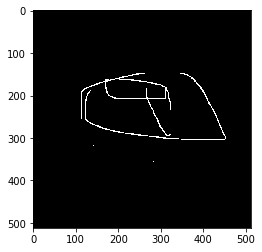

In [15]:
def stringToRGB(base64_string):
    imgdata = base64.b64decode(str(base64_string))
    image = Image.open(io.BytesIO(imgdata))
    return cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)


img = stringToRGB(data)

print(img)

plt.imshow(img)